(array([ 737028.66666667,  737028.79166667,  737028.91666667,
         737029.04166667,  737029.16666667,  737029.29166667,
         737029.41666667,  737029.54166667]),
 <a list of 8 Text xticklabel objects>)

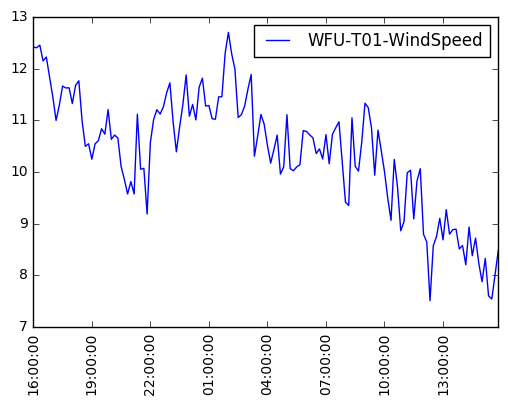

In [1]:
#########################
## Bazefield REST API exapmle using Python

## (C) Bazefield AS 2018
## This code is for demonstration & training purposes only.

## The below example shows how to query aggregated results of a tag(s)
## of a tag and return it in either JSON or pandas format

#########################

#import the pyBaze class which has basic functions to call the REST API
from pybaze import pyBaze

#Set up a connection to the server.  Replace this code with your own Baze server and User API Key
serverName = 'https://demo.bazefield.com'
apiKey = '_SOnIDOj7MNgFtUuusZqBoE3KJ8AQWX1'        #Unique to your user name
bazeConn = pyBaze(serverName, apiKey)

#Get all raw data measurements of WFU-T01-WindSpeed tag from 2018-12-01 midnight to 2018-12-01 1AM into a JSON data object
tag = 'WFU-T01-WindSpeed'
start = '2018-12-01 00:00'
end = '2018-12-02 00:00'
intervalSec = 600             #aggregate interval in seconds (600 = 10 minute)
aggregate = 'timeaverage'     #minimum,maximum,average,timeaverage,stdev,start,end,interpolative,count
dataJson = bazeConn.getAggregatesJson(tag,start,end,aggregate,intervalSec)

#....or return the data in a python pandas data frame
dataPandas = bazeConn.getAggregatesPandas(tag,start,end,aggregate,intervalSec)

%matplotlib inline
import matplotlib.pyplot as plt
timePlot = plt.plot(dataPandas['TimeUtc'],dataPandas['WFU-T01-WindSpeed'])
plt.legend(loc=1)
plt.xticks(rotation=90)

(array([ 737028.66666667,  737028.79166667,  737028.91666667,
         737029.04166667,  737029.16666667,  737029.29166667,
         737029.41666667,  737029.54166667]),
 <a list of 8 Text xticklabel objects>)

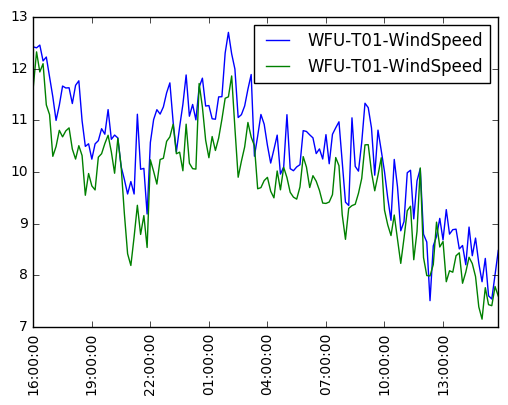

In [2]:
#Get all raw data measurements of WFU T01 And T02 Windspeed tag from 2018-12-01 midnight to 2018-12-01 1AM into a pandas object
tag = ['WFU-T01-WindSpeed','WFU-T02-WindSpeed']
start = '2018-12-01 00:00'
end = '2018-12-02 00:00'
intervalSec = 600             #aggregate interval in seconds (600 = 10 minute)
aggregate = 'timeaverage'     #minimum,maximum,average,timeaverage,stdev,start,end,interpolative,count
dataPandas = bazeConn.getAggregatesPandas(tag,start,end,aggregate,intervalSec)
%matplotlib inline
import matplotlib.pyplot as plt
timePlot = plt.plot(dataPandas['TimeUtc'],dataPandas['WFU-T01-WindSpeed'],dataPandas['TimeUtc'],dataPandas['WFU-T02-WindSpeed'])
plt.legend(loc=1)
plt.xticks(rotation=90)

(array([  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.]),
 <a list of 9 Text xticklabel objects>)

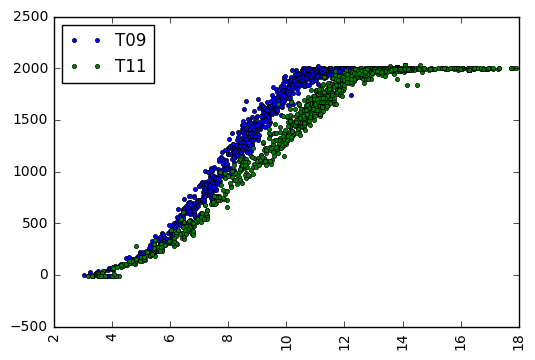

In [5]:
#Plot power curve of 2 turbines on top of each other
tag = ['WFU-T09-WindSpeed','WFU-T11-WindSpeed','WFU-T09-ActivePower','WFU-T11-ActivePower']
start = '2018-11-25 00:00'
end = '2018-12-02 00:00'
intervalSec = 600             #aggregate interval in seconds (600 = 10 minute)
aggregate = 'timeaverage'     #minimum,maximum,average,timeaverage,stdev,start,end,interpolative,count
dataPandas = bazeConn.getAggregatesPandas(tag,start,end,aggregate,intervalSec)
%matplotlib inline
import matplotlib.pyplot as plt
pcPlot = plt.plot(dataPandas['WFU-T09-WindSpeed'],dataPandas['WFU-T09-ActivePower'],'bo', label = 'T09', markersize=3)
plt.plot(dataPandas['WFU-T11-WindSpeed'],dataPandas['WFU-T11-ActivePower'],'go', label = 'T11', markersize=3)
plt.legend(loc=2)
plt.xticks(rotation=90)